In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm


In [ ]:

states = ["W", "R", "S"]
n_states = len(states)


observations_space = ["L", "M", "H"]
n_observations = len(observations_space)

start_probability = np.array([0.4, 0.3, 0.3])


transition_probability = np.array([
    [0.6, 0.3, 0.1],  # W
    [0.2, 0.7, 0.1],  # R
    [0.3, 0.2, 0.5],  # S
])

# Define the observation likelihoods (emission probabilities)
emission_probability = np.array([
    [0.1, 0.7, 0.2],  # W -> L, M, H
    [0.05, 0.25, 0.7],  # R -> L, M, H
    [0.8, 0.15, 0.05],  # S -> L, M, H
])


# Create and configure the HMM model
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability



Probability of the observations:  0.021117250000000008
Most likely hidden states: [0 1 2]


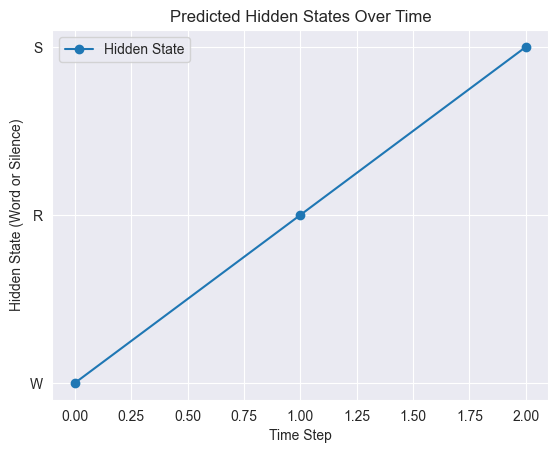

In [ ]:


observations = np.array([1, 2, 0]).reshape(-1, 1)
prob_of_obs = np.exp(model.score(observations))
print("Probability of the observations: ", prob_of_obs)

hidden_states = model.predict(observations)
print("Most likely hidden states:", hidden_states)

# Plot the results for visualization
sns.set_style("darkgrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel("Time Step")
plt.ylabel("Hidden State (Word or Silence)")
plt.yticks(ticks=range(n_states), labels=states)
plt.legend()
plt.title("Predicted Hidden States Over Time")
plt.show()


# [0, 1, 2] -> [W, R, S]



In [ ]:

# din repo
num_steps = 10000
observations, hidden_states_true = model.sample(num_steps)
observations = observations.astype(int)        
hidden_states_true = hidden_states_true.astype(int)  

print("HMM Sample 10000 steps:")
print(f"Sequence length: {num_steps}")


model_learned = hmm.CategoricalHMM(
    n_components=2,
    n_iter=100,
    tol=1e-4,
    random_state=0,
    init_params="ste",  
)
model_learned.fit(observations)

unique, counts = np.unique(observations, return_counts=True)
empirical_distribution = counts / counts.sum()
print("Empirical distribution of observations [L, M, H]:", empirical_distribution)


HMM Sample 10000 steps:
Sequence length: 10000
Empirical distribution of observations [L, M, H]: [0.2011 0.3914 0.4075]
